<a href="https://colab.research.google.com/github/Achyuta-Harshavardhan/Random-Forst-Regressor/blob/main/Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import all the necessaru libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
# Read the data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Random Forest Regressor/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# Check Missing Values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
# Convert year column into number of years
df['Current Year']=2020
df['No Year'] = df['Current Year'] - df['Year']

In [5]:
# One hot encoding for categorical features
Fuel_Type     = pd.get_dummies(df['Fuel_Type'],drop_first=True)
Seller_Type   = pd.get_dummies(df['Seller_Type'],drop_first=True)
Transmission  = pd.get_dummies(df['Transmission'],drop_first=True)
Owner         = pd.get_dummies(df['Owner'],drop_first=True)

In [6]:
# Drop the unnecessary columns
df.drop(['Car_Name','Current Year','Year','Fuel_Type','Seller_Type','Transmission','Owner'],axis=1,inplace=True)

df = pd.concat([df,Fuel_Type,Seller_Type,Transmission,Owner],axis=1)

In [7]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,No Year,Diesel,Petrol,Individual,Manual,1,3
0,3.35,5.59,27000,6,0,1,0,1,0,0
1,4.75,9.54,43000,7,1,0,0,1,0,0
2,7.25,9.85,6900,3,0,1,0,1,0,0
3,2.85,4.15,5200,9,0,1,0,1,0,0
4,4.60,6.87,42450,6,1,0,0,1,0,0


In [8]:
#Independent and Dependent Features
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
# Train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [10]:
# Random Forst Regressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [11]:
# Predictions
pred = rf.predict(x_test)

In [12]:
# Metrics
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 0.7485582417582417
MSE: 2.4688878751648335
RMSE: 1.571269510671175


In [13]:
# Hyperparameters
params_rf =   {'n_estimators'     : [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
               'max_features'     : ['auto', 'sqrt'],
               'max_depth'        : [int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf' : [1, 2, 5, 10]}

In [14]:
# Randomized Search CV
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = params_rf,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5,
                               random_state=42, 
                               n_jobs = 1)

In [15]:
rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [16]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [17]:
rf_random.best_score_

-3.734290321284896

In [18]:
pred = rf_random.predict(x_test)
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 0.8444743956043921
MSE: 3.602775480636262
RMSE: 1.8980978585510975


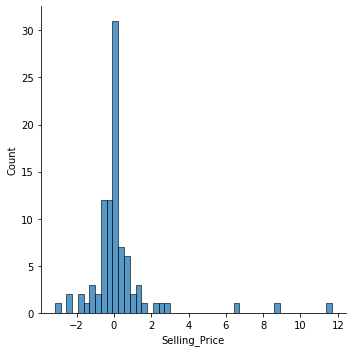

In [19]:
sns.displot(y_test-pred)

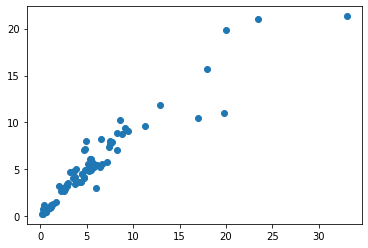

In [20]:
plt.scatter(y_test,pred)